<a href="https://colab.research.google.com/github/nath229/My-first-Github-project-with-Eckovation/blob/master/R_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R code starts here

**Q1. Importing libraries and dataset (2 marks)**

In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
%%R
data <- read.csv("/content/Mall_Customers.csv")


**Q2. Performing EDA on dataset ( head()-> 1 marks, summary()-> 1 marks)**

head() function is used to see the first samples of the dataset

In [7]:
%%R
head(data)

  CustomerID Gender Age Annual.Income..k.. Spending.Score..1.100.
1          1   Male  19                 15                     39
2          2   Male  21                 15                     81
3          3 Female  20                 16                      6
4          4 Female  23                 16                     77
5          5 Female  31                 17                     40
6          6 Female  22                 17                     76


Summary() is uesd to show the information of the datset

In [8]:
%%R
summary(data)

   CustomerID        Gender         Age        Annual.Income..k..
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50                Median :36.00   Median : 61.50    
 Mean   :100.50                Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         


In [9]:
%%R
print(ncol(data))
print(nrow(data))

[1] 5
[1] 200


In [10]:
%%R
names(data)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."


**Q3. Customer Gender visualization (Barplot -> 1 mark, Pie Plot -> 1 mark)**

In [11]:
%%R
table(data$Gender)


Female   Male 
   112     88 


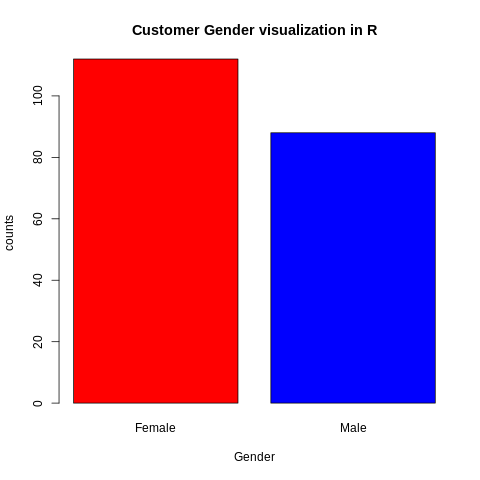

In [18]:
%%R
barplot(table(data$Gender),xlab='Gender',ylab='counts',col=c('red','blue'),main='Customer Gender visualization in R')

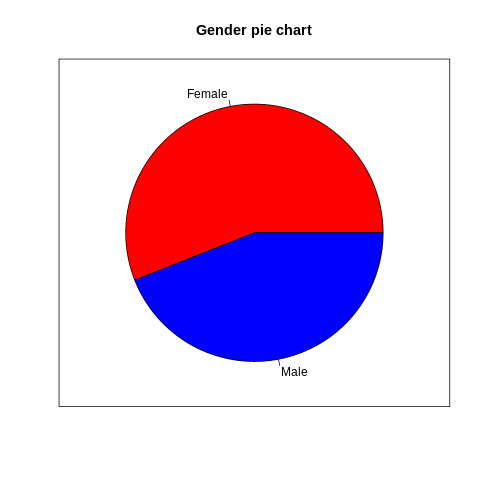

In [16]:
%%R
pie(table(data$Gender),main='Gender pie chart',col = c('red','blue'))
box()

**Q4. Creating visualizations to analyze the annual income of the customers. Plot Histogram. (3 marks)**

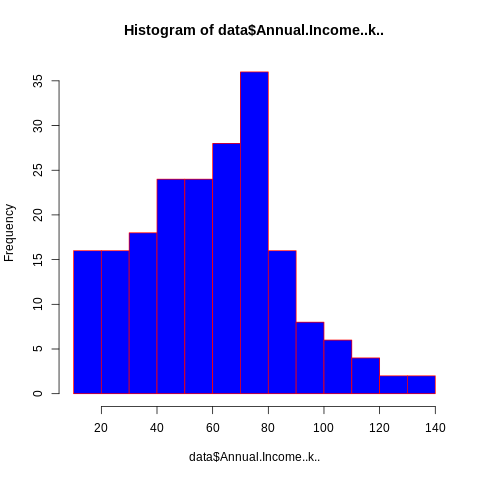

In [19]:
%%R
hist(data$Annual.Income..k..,border = "red",col = "blue")

**Q5. Determining Optimal Clusters using K-means clustering (10 marks)**

Select the fields that we will be working with

In [20]:
%%R
df <- data[,4:5]
head(df)

  Annual.Income..k.. Spending.Score..1.100.
1                 15                     39
2                 15                     81
3                 16                      6
4                 16                     77
5                 17                     40
6                 17                     76


WCSS method is using  in determining the optimal clusters

# One popular metrics is the Within cluster sum of squares. R provides this as kmeans$withinss. What this means is the distance the vectors in each cluster are from their respected centroid.

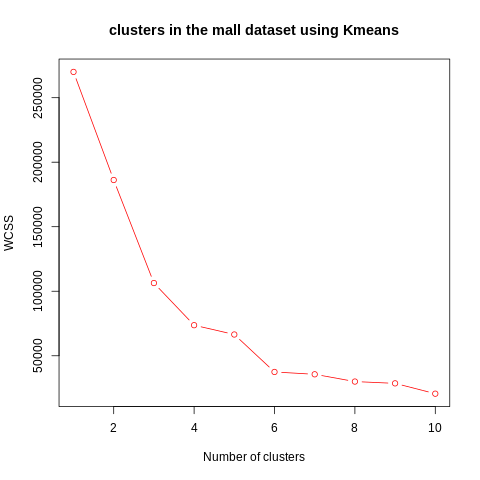

In [21]:
%%R

# Using the elbow method to find the optimal number of clusters
set.seed(6)# equivalent to  random state in python
wcss <-  vector()
for (i in 1:10) 
  wcss[i] <-  sum(kmeans(df, i)$ withinss)
plot(1:10, wcss, type='b',col='red',main = "clusters in the mall dataset using Kmeans", xlab="Number of clusters", ylab="WCSS")

Improve drops from 5 to 10

In [22]:
%%R
set.seed(29)
kmeans <-  kmeans(df, 5, iter.max = 300, nstart = 10) #n_clusters = 5
kmeans

K-means clustering with 5 clusters of sizes 35, 23, 39, 22, 81

Cluster means:
  Annual.Income..k.. Spending.Score..1.100.
1           88.20000               17.11429
2           26.30435               20.91304
3           86.53846               82.12821
4           25.72727               79.36364
5           55.29630               49.51852

Clustering vector:
  [1] 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 [38] 4 2 4 2 4 2 5 2 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [75] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[112] 5 5 5 5 5 5 5 5 5 5 5 5 3 1 3 5 3 1 3 1 3 5 3 1 3 1 3 1 3 1 3 5 3 1 3 1 3
[149] 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
[186] 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3

Within cluster sum of squares by cluster:
[1] 12511.143  5098.696 13444.051  3519.455  9875.111
 (between_SS / total_SS =  83.5 %)

Available components:

[1] "cluster"      "centers"      "totss"    

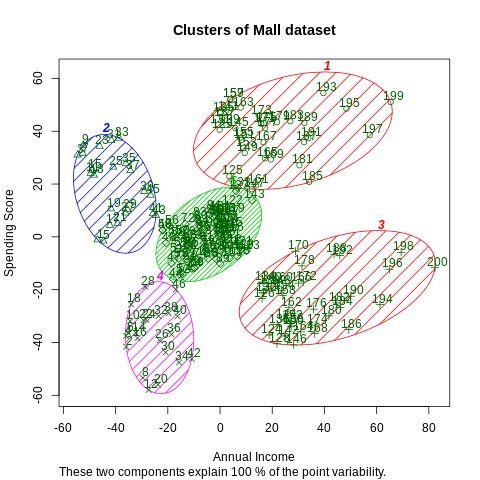

In [23]:
%%R
library(cluster)
clusplot(df, kmeans$cluster,
          lines = 0, 
         labels = 2,
         shade = TRUE,
         color = TRUE,
         main = "Clusters of Mall dataset",
         xlab="Annual Income",
         ylab="Spending Score")